In [1]:
# Package ID: edi.949.1 Cataloging System:https://pasta.edirepository.org.
# Data set title: Journey North - Monarch Butterfly and Milkweed observations by volunteer community scientists across Central and North America (1996-2020).
# Data set creator:  Nancy Sheehan - University of Wisconsin - Madison Arboretum, Journey North Program 
# Data set creator:  Luis Weber-Grullon - University of Wisconsin - Madison 
# Contact:  Nancy Sheehan - Program Coordinator University of Wisconsin - Madison Arboretum, Journey North Program  - nsheehan@wisc.edu
# Stylesheet v1.0 for metadata conversion into program: John H. Porter, Univ. Virginia, jporter@virginia.edu      


In [2]:
#Import Libraries
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import folium
from folium import plugins

In [3]:
infile1  ="https://pasta.lternet.edu/package/data/eml/edi/949/1/02f2be4d90198702c46fa36556f3749a".strip() 
infile1  = infile1.replace("https://","http://")

In [4]:
dt1 =pd.read_csv(infile1 
          ,skiprows=1
            ,sep=","  
                ,quotechar='"' 
           , names=[
                    "id",     
                    "sighting_date",     
                    "species",     
                    "number",     
                    "latitude",     
                    "longitude",     
                    "flag_location",     
                    "comments",     
                    "school",     
                    "grade",     
                    "image_url",     
                    "customerid",     
                    "number_old",     
                    "flag_number",     
                    "species_old",     
                    "flag_species"    ]
# data type checking is commented out because it may cause data
# loads to fail if the data contains inconsistent values. Uncomment 
# the following lines to enable data type checking
         
#            ,dtype={  
#             'id':'str' , 
#             'sighting_date':'str' ,  
#             'species':'str' , 
#             'number':'int' , 
#             'latitude':'float' , 
#             'longitude':'float' ,  
#             'flag_location':'str' ,  
#             'comments':'str' ,  
#             'school':'str' ,  
#             'grade':'str' ,  
#             'image_url':'str' ,  
#             'customerid':'str' , 
#             'number_old':'float' ,  
#             'flag_number':'str' ,  
#             'species_old':'str' ,  
#             'flag_species':'str'  
#        }
          ,parse_dates=[
                        'sighting_date',
                ] 
            ,na_values={
                  'comments':[
                          '-999999.999',],
                  'school':[
                          '-999999.999',],
                  'grade':[
                          '-999999.999',],
                  'image_url':[
                          '-999999.999',],
                  'number_old':[
                          '-999999.999',],
                  'species_old':[
                          '-999999.999',],} 
            
    )

/opt/anaconda3/envs/dataScience/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
# Coerce the data into the types specified in the metadata  
dt1.id=dt1.id.astype('category') 
# Since date conversions are tricky, the coerced dates will go into a new column with _datetime appended
# This new column is added to the dataframe but does not show up in automated summaries below. 
dt1=dt1.assign(sighting_date_datetime=pd.to_datetime(dt1.sighting_date,errors='coerce'))  
dt1.species=dt1.species.astype('category') 
dt1.number=pd.to_numeric(dt1.number,errors='coerce',downcast='integer') 
dt1.latitude=pd.to_numeric(dt1.latitude,errors='coerce') 
dt1.longitude=pd.to_numeric(dt1.longitude,errors='coerce')  
dt1.flag_location=dt1.flag_location.astype('category')  
dt1.comments=dt1.comments.astype('category')  
dt1.school=dt1.school.astype('category')  
dt1.grade=dt1.grade.astype('category')  
dt1.image_url=dt1.image_url.astype('category')  
dt1.customerid=dt1.customerid.astype('category') 
dt1.number_old=pd.to_numeric(dt1.number_old,errors='coerce')  
dt1.flag_number=dt1.flag_number.astype('category')  
dt1.species_old=dt1.species_old.astype('category')  
dt1.flag_species=dt1.flag_species.astype('category') 

In [6]:
dt1.head()

,id,sighting_date,species,number,latitude,longitude,flag_location,comments,school,grade,image_url,customerid,number_old,flag_number,species_old,flag_species,sighting_date_datetime
0,850841703,1996-12-16,Monarch Adult Sighted,1,27.594,-81.362,0,On the ballfield a solitary monarch butterfly ...,Walker memorial junior academy,10.0,NaN,135,NaN,1,Monarch Butterfly,1,1996-12-16
1,851824801,1996-12-06,Monarch Adult Sighted,1,30.420,-87.224,0,Our 5th grade Discovery students who went alon...,Hambrick elementary school,5.0,NaN,150,NaN,1,Monarch Butterfly,1,1996-12-06
2,854409931,1996-09-21,Monarch Adult Sighted,1,40.817,-96.710,0,We saw several hundred monarchs in our school ...,NaN,5.0,NaN,9701054,NaN,1,Monarch Butterfly,1,1996-09-21
3,854557206,1996-09-21,Monarch Adult Sighted,1,40.817,-96.710,0,Over a hundered monarchs in our school butterf...,Fredstrom elementary school,6.0,NaN,175,NaN,1,Monarch Butterfly,1,1996-09-21
4,855061862,1997-01-01,Monarch Adult Sighted,1,34.244,-77.946,0,"I Thought I Saw It, But I Was Suprised To See ...",Gregory,3.0,NaN,181,NaN,1,Monarch Butterfly,1,1997-01-01


In [7]:
dt1.species.unique()

['Monarch Adult Sighted', 'Monarch Adult (FIRST sighted)', 'Monarch Egg (FIRST sighted)', 'Monarch (OTHER Observations)', 'Monarch Larva (FIRST sighted)', ..., 'Monarch Fall Roost', 'Monarch Egg Sighted', 'Monarch Larva Sighted', 'Monarch, Captive-Reared', 'Milkweed Sighted']
Length: 12
Categories (12, object): ['Monarch Adult Sighted', 'Monarch Adult (FIRST sighted)', 'Monarch Egg (FIRST sighted)', 'Monarch (OTHER Observations)', ..., 'Monarch Egg Sighted', 'Monarch Larva Sighted', 'Monarch, Captive-Reared', 'Milkweed Sighted']

(array([138715.,   6876.,  13581.,   4898.,   7689.,   8465.,   5035.,
          8736.,  17378.,  16060.]),
 array([ 0. ,  1.1,  2.2,  3.3,  4.4,  5.5,  6.6,  7.7,  8.8,  9.9, 11. ]),
 <BarContainer object of 10 artists>)

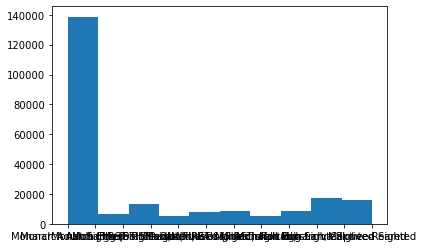

In [8]:
plt.hist(dt1['species'])

In [9]:
dt1.groupby('species')['species'].count()

species
Milkweed (FIRST sighted)           8465
Milkweed Sighted                   1721
Monarch (OTHER Observations)      13581
Monarch Adult (FIRST sighted)     36409
Monarch Adult Sighted            102306
Monarch Egg (FIRST sighted)        6876
Monarch Egg Sighted                8736
Monarch Fall Roost                 5035
Monarch Larva (FIRST sighted)      4898
Monarch Larva Sighted             17378
Monarch PEAK Migration             7689
Monarch, Captive-Reared           14339
Name: species, dtype: int64

# Cleaning

I've decided to narrow the dataset to the years 2015-2020, and as I'm mainly concerned with the fall migration, exclude any observations before August.

Since I'm looking at "peak migration" numbers and fall roosts, I'm also excluding any observations that number the monarchs between 2 and 9. Many observations were coded with the number as 1, and many were for hundreds or thousands of monarchs, so I will keep those.

I also noticed some observations were included which were west of the Rockies. This is a separate population, so I excluded any observations with a longitude of greater than -105.

In [10]:
# Selecting only Fall roosts and peak migration observations
migration = pd.DataFrame(dt1.loc[((dt1['species'] == 'Monarch Fall Roost') | (dt1['species'] == 'Monarch PEAK Migration'))])

In [11]:
#drop unused columns
migration.drop(['flag_location', 'school', 'grade', 'customerid', 'number_old', 'flag_number', 'flag_species', 'species_old'], axis=1, inplace=True)

In [12]:
migration['year'] = migration['sighting_date_datetime'].dt.year
migration['month'] = migration['sighting_date_datetime'].dt.month
migration['month_name'] = migration['sighting_date_datetime'].dt.month_name()
migration['week_num'] = migration['sighting_date_datetime'].dt.isocalendar().week

In [13]:
migration.head()

,id,sighting_date,species,number,latitude,longitude,comments,image_url,sighting_date_datetime,year,month,month_name,week_num
3541,966119477,2000-08-08,Monarch PEAK Migration,1,47.066,-94.504,The first signs of the migration in Minnesota ...,NaN,2000-08-08,2000,8,August,32
3544,966258999,2000-08-15,Monarch PEAK Migration,1,44.957,-93.540,I observed the first big pulse of fall migrati...,NaN,2000-08-15,2000,8,August,33
3547,966374597,2000-08-15,Monarch PEAK Migration,1,45.009,-93.340,Lots of Monarch activity today! We counted 58...,NaN,2000-08-15,2000,8,August,33
3551,966612408,2000-08-17,Monarch PEAK Migration,1,45.050,-93.210,The day was an exciting one. We had about 75 b...,NaN,2000-08-17,2000,8,August,33
3572,966879879,2000-08-20,Monarch PEAK Migration,1,46.926,-96.850,It was totally awesome. It was about 4:30pm on...,NaN,2000-08-20,2000,8,August,33


In [14]:
migration.groupby('year')['year'].count()

year
2000     176
2001     253
2002      73
2003     210
2004     131
2005     512
2006     584
2007     609
2008     348
2009     402
2010     809
2011     582
2012     520
2013     348
2014     863
2015     920
2016     692
2017     907
2018    1527
2019    1452
2020     806
Name: year, dtype: int64

(array([ 429.,  283.,  643., 1193.,  750., 1391.,  868., 1783., 1599.,
        3785.]),
 array([2000., 2002., 2004., 2006., 2008., 2010., 2012., 2014., 2016.,
        2018., 2020.]),
 <BarContainer object of 10 artists>)

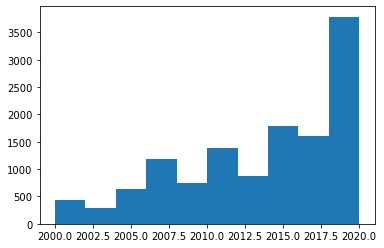

In [15]:
plt.hist(migration['year'])

In [16]:
migration.groupby('species')['species'].count()

species
Milkweed (FIRST sighted)            0
Milkweed Sighted                    0
Monarch (OTHER Observations)        0
Monarch Adult (FIRST sighted)       0
Monarch Adult Sighted               0
Monarch Egg (FIRST sighted)         0
Monarch Egg Sighted                 0
Monarch Fall Roost               5035
Monarch Larva (FIRST sighted)       0
Monarch Larva Sighted               0
Monarch PEAK Migration           7689
Monarch, Captive-Reared             0
Name: species, dtype: int64

In [17]:
migration.shape

(12724, 13)

In [18]:
migration.isnull().sum()

id                           0
sighting_date                0
species                      0
number                       0
latitude                     0
longitude                    0
comments                     9
image_url                 9594
sighting_date_datetime       0
year                         0
month                        0
month_name                   0
week_num                     0
dtype: int64

(array([1.760e+02, 6.390e+02, 9.150e+02, 1.950e+03, 1.590e+03, 2.755e+03,
        3.987e+03, 7.070e+02, 4.000e+00, 1.000e+00]),
 array([18.91 , 22.612, 26.314, 30.016, 33.718, 37.42 , 41.122, 44.824,
        48.526, 52.228, 55.93 ]),
 <BarContainer object of 10 artists>)

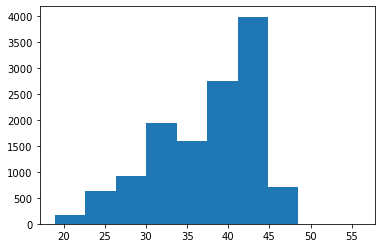

In [19]:
plt.hist(migration['latitude'])

(array([ 429.,  283.,  643., 1193.,  750., 1391.,  868., 1783., 1599.,
        3785.]),
 array([2000., 2002., 2004., 2006., 2008., 2010., 2012., 2014., 2016.,
        2018., 2020.]),
 <BarContainer object of 10 artists>)

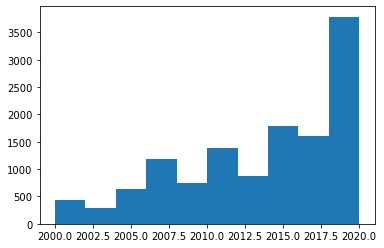

In [20]:
plt.hist(migration['year'])

In [21]:
# Select only years 2015 onward
migration = migration[migration['year'] > 2014] 

In [22]:
# Selecting only months 8-11
migration = migration[migration['month'] > 7]
migration = migration[migration['month'] < 12]

In [23]:
# Selecting only observations of more than 9 butterflies or 1 (as many are coded incorrectly as 1)
migration = migration.loc[(migration['number'] == 1) | (migration['number'] > 9)]

In [24]:
# Selecting only Eastern monarchs
migration = migration[migration['longitude'] > -105] 

In [25]:
migration.shape

(5994, 13)

(array([  92.,   80.,  274.,  498.,  574.,  611., 1078., 1959.,  816.,
          12.]),
 array([18.91  , 22.0129, 25.1158, 28.2187, 31.3216, 34.4245, 37.5274,
        40.6303, 43.7332, 46.8361, 49.939 ]),
 <BarContainer object of 10 artists>)

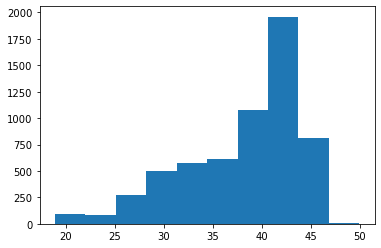

In [26]:
plt.hist(migration['latitude'])

In [27]:
# Creating a datafram to store stats for each month and year
stats = pd.DataFrame(columns=['year', 'month', '25%', 'median', '75%', 'num_observations'])

In [28]:
# Iterates through each year and month and calculated the statistics of the latitude of the migration

# Each year from 2015-2020
for year in range(2015, 2021):
    # Iterates through each month August-Nov
    for month in range(8, 12):
        df = migration.loc[(migration['year'] == year) & (migration['month'] == month)]
        df_stats = df[['latitude']].describe()

        #add new row to end of DataFrame
        stats.loc[len(stats.index)] = [year, month, df_stats.iloc[4,0], df_stats.iloc[5,0], df_stats.iloc[6,0], df_stats.iloc[0,0]]

In [29]:
stats.year = stats.year.astype(int)
stats.month = stats.month.astype(int)
stats.num_observations = stats.num_observations.astype(int)

In [30]:
stats.head()

,year,month,25%,median,75%,num_observations
0,2015,8,44.32900,44.8115,45.1100,40
1,2015,9,39.60675,41.3840,42.6670,398
2,2015,10,27.02500,30.8390,33.7555,390
3,2015,11,21.51500,23.0330,24.6435,51
4,2016,8,43.86100,44.7690,45.6440,15


In [31]:
# Add a row for each month with the average for all years 2015-2020
# Iterates through each month August-Nov
for month in range(8, 12):
    df = migration.loc[(migration['month'] == month)]
    df_stats = df[['latitude']].describe()

    #add new row to end of DataFrame
    stats.loc[len(stats.index)] = ["All", month, df_stats.iloc[4,0], df_stats.iloc[5,0], df_stats.iloc[6,0], df_stats.iloc[0,0]]

In [32]:
stats.tail()

,year,month,25%,median,75%,num_observations
23,2020,11,29.41375,38.934,38.9340,10.0
24,All,8,43.69225,44.561,45.3295,512.0
25,All,9,39.92300,41.631,43.0730,2977.0
26,All,10,30.21700,33.639,38.1380,2301.0
27,All,11,21.29600,25.638,30.0740,204.0


In [33]:
stats.num_observations = stats.num_observations.astype(int)
stats.year = stats.year.astype('category')

In [34]:
migration.shape

(5994, 13)

In [35]:
stats.to_csv('migration_stats.csv')
migration.to_csv('migration2015-2020.csv')

In [36]:
stats.dtypes

year                category
month                  int64
25%                  float64
median               float64
75%                  float64
num_observations       int64
dtype: object

# Maps and Visualizations

In [37]:
# Let's get the basic location data for Chicago, just to get started
address = 'Chicago, IL'

geolocator = Nominatim(user_agent="sje_monarch")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Chicago are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Chicago are 41.8755616, -87.6244212.


In [38]:
map_us = folium.Map(location=[latitude, longitude], zoom_start=4)
map_us

In [39]:
# Try map with a latitude line
map_lat = folium.Map(location=[latitude, longitude], zoom_start=4)
map_lat

In [40]:
# Make a map for August 2020
stats.head()

,year,month,25%,median,75%,num_observations
0,2015,8,44.32900,44.8115,45.1100,40
1,2015,9,39.60675,41.3840,42.6670,398
2,2015,10,27.02500,30.8390,33.7555,390
3,2015,11,21.51500,23.0330,24.6435,51
4,2016,8,43.86100,44.7690,45.6440,15


In [41]:
# Make a map with median line from -104 to -60

aug2020 = stats.loc[(stats['month'] == 8) & (stats['year'] == 2020)]

map_lat = folium.Map(location=[latitude, longitude+5], zoom_start=4)
med_lat = aug2020['median'].iloc[0]
med_line = [(med_lat, -105), (med_lat, -60)]
q1_lat = aug2020['25%'].iloc[0]
q1_line = [(q1_lat, -105), (q1_lat, -60)]
q3_lat = aug2020['75%'].iloc[0]
q3_line = [(q3_lat, -105), (q3_lat, -60)]

folium.Polygon([(q1_lat, -105), (q3_lat, -105), (q3_lat, -60), (q1_lat, -60)],
               color="blue",
               weight=0,
               fill=True,
               fill_color="orange",
               fill_opacity=0.4).add_to(map_lat)

folium.PolyLine(med_line,
                color='orange',
                weight=13,
                opacity=0.8).add_to(map_lat)

folium.PolyLine(q1_line,
                color='yellow',
                weight=10,
                opacity=0.8).add_to(map_lat)
folium.PolyLine(q3_line,
                color='yellow',
                weight=10,
                opacity=0.8).add_to(map_lat)

title_html = '''
             <h3 align="center" style="font-size:20px"><b>August 2020</b></h3>
             '''
map_lat.get_root().html.add_child(folium.Element(title_html))

marker = folium.Marker(
    location=[med_lat, longitude],
    popup="<stong>Allianz Arena</stong>",
    icon=folium.DivIcon(html=f"""
      <div style="color:#f00;background:#fff;width:60px;text-align:center;">Median Latitude</div>
    """))
#marker.add_to(map_lat)


map_lat

In [42]:
map_lat.save('map1.html')

In [43]:
# Make a map with median line from -104 to -60

sep2020 = stats.loc[(stats['month'] == 9) & (stats['year'] == 2020)]
sep2020obs = migration.loc[(migration['month'] == 9) & (migration['year'] == 2020)]


map_lat = folium.Map(location=[latitude, longitude+5], zoom_start=4)
med_lat = sep2020['median'].iloc[0]
med_line = [(med_lat, -105), (med_lat, -60)]
q1_lat = sep2020['25%'].iloc[0]
q1_line = [(q1_lat, -105), (q1_lat, -60)]
q3_lat = sep2020['75%'].iloc[0]
q3_line = [(q3_lat, -105), (q3_lat, -60)]

folium.Polygon([(q1_lat, -105), (q3_lat, -105), (q3_lat, -60), (q1_lat, -60)],
               color="blue",
               weight=0,
               fill=True,
               fill_color="orange",
               fill_opacity=0.4).add_to(map_lat)

folium.PolyLine(med_line,
                color='orange',
                weight=13,
                opacity=0.8).add_to(map_lat)

folium.PolyLine(q1_line,
                color='yellow',
                weight=10,
                opacity=0.8).add_to(map_lat)
folium.PolyLine(q3_line,
                color='yellow',
                weight=10,
                opacity=0.8).add_to(map_lat)

title_html = '''
             <h3 align="center" style="font-size:20px"><b>September 2020</b></h3>
             '''
map_lat.get_root().html.add_child(folium.Element(title_html))

# add markers to map
for lat, lng in zip(sep2020obs['latitude'], sep2020obs['longitude']):
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        color='orange',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lat)


marker = folium.Marker(
    location=[med_lat, longitude],
    popup="<stong>Allianz Arena</stong>",
    icon=folium.DivIcon(html=f"""
      <div style="color:#f00;background:#fff;width:60px;text-align:center;">Median Latitude</div>
    """))
#marker.add_to(map_lat)


map_lat

In [44]:
# Make a map with median line from -104 to -60

oct2020 = stats.loc[(stats['month'] == 10) & (stats['year'] == 2020)]
oct2020obs = migration.loc[(migration['month'] == 10) & (migration['year'] == 2020)]

map_lat = folium.Map(location=[latitude, longitude+5], zoom_start=4)
med_lat = oct2020['median'].iloc[0]
med_line = [(med_lat, -105), (med_lat, -60)]
q1_lat = oct2020['25%'].iloc[0]
q1_line = [(q1_lat, -105), (q1_lat, -60)]
q3_lat = oct2020['75%'].iloc[0]
q3_line = [(q3_lat, -105), (q3_lat, -60)]

folium.Polygon([(q1_lat, -105), (q3_lat, -105), (q3_lat, -60), (q1_lat, -60)],
               color="blue",
               weight=0,
               fill=True,
               fill_color="orange",
               fill_opacity=0.4).add_to(map_lat)

folium.PolyLine(med_line,
                color='orange',
                weight=13,
                opacity=0.8).add_to(map_lat)

folium.PolyLine(q1_line,
                color='yellow',
                weight=10,
                opacity=0.8).add_to(map_lat)
folium.PolyLine(q3_line,
                color='yellow',
                weight=10,
                opacity=0.8).add_to(map_lat)

title_html = '''
             <h3 align="center" style="font-size:20px"><b>October 2020</b></h3>
             '''
map_lat.get_root().html.add_child(folium.Element(title_html))

# add markers to map
for lat, lng in zip(oct2020obs['latitude'], oct2020obs['longitude']):
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        color='orange',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lat)
    
marker = folium.Marker(
    location=[med_lat, longitude],
    popup="<stong>Butterfly Migration</stong>",
    icon=folium.DivIcon(html=f"""
      <div style="color:#f00;background:#fff;width:60px;text-align:center;">Median Latitude</div>
    """))
#marker.add_to(map_lat)


map_lat

In [45]:
# Make a map with median line from -104 to -60

nov2020 = stats.loc[(stats['month'] == 11) & (stats['year'] == 2020)]

map_lat = folium.Map(location=[latitude, longitude+5], zoom_start=4)
med_lat = nov2020['median'].iloc[0]
med_line = [(med_lat, -105), (med_lat, -60)]
q1_lat = nov2020['25%'].iloc[0]
q1_line = [(q1_lat, -105), (q1_lat, -60)]
q3_lat = nov2020['75%'].iloc[0]
q3_line = [(q3_lat, -105), (q3_lat, -60)]

folium.Polygon([(q1_lat, -105), (q3_lat, -105), (q3_lat, -60), (q1_lat, -60)],
               color="blue",
               weight=0,
               fill=True,
               fill_color="orange",
               fill_opacity=0.4).add_to(map_lat)

folium.PolyLine(med_line,
                color='orange',
                weight=13,
                opacity=0.8).add_to(map_lat)

folium.PolyLine(q1_line,
                color='yellow',
                weight=10,
                opacity=0.8).add_to(map_lat)
folium.PolyLine(q3_line,
                color='yellow',
                weight=10,
                opacity=0.8).add_to(map_lat)

title_html = '''
             <h3 align="center" style="font-size:20px"><b>November 2020</b></h3>
             '''
map_lat.get_root().html.add_child(folium.Element(title_html))

marker = folium.Marker(
    location=[med_lat, longitude],
    popup="<stong>Allianz Arena</stong>",
    icon=folium.DivIcon(html=f"""
      <div style="color:#f00;background:#fff;width:60px;text-align:center;">Median Latitude</div>
    """))
#marker.add_to(map_lat)


map_lat

In [46]:
# Try adding observations to map??

nov2020 = stats.loc[(stats['month'] == 11) & (stats['year'] == 2020)]
nov2020obs = migration.loc[(migration['month'] == 11) & (stats['year'] == 2020)]

map_lat = folium.Map(location=[latitude, longitude+5], zoom_start=4)
med_lat = nov2020['median'].iloc[0]
med_line = [(med_lat, -105), (med_lat, -60)]
q1_lat = nov2020['25%'].iloc[0]
q1_line = [(q1_lat, -105), (q1_lat, -60)]
q3_lat = nov2020['75%'].iloc[0]
q3_line = [(q3_lat, -105), (q3_lat, -60)]



folium.Polygon([(q1_lat, -105), (q3_lat, -105), (q3_lat, -60), (q1_lat, -60)],
               color="blue",
               weight=0,
               fill=True,
               fill_color="orange",
               fill_opacity=0.4).add_to(map_lat)

folium.PolyLine(med_line,
                color='orange',
                weight=13,
                opacity=0.8).add_to(map_lat)

folium.PolyLine(q1_line,
                color='yellow',
                weight=10,
                opacity=0.8).add_to(map_lat)
folium.PolyLine(q3_line,
                color='yellow',
                weight=10,
                opacity=0.8).add_to(map_lat)

title_html = '''
             <h3 align="center" style="font-size:20px"><b>November 2020</b></h3>
             '''
map_lat.get_root().html.add_child(folium.Element(title_html))

marker = folium.Marker(
    location=[med_lat, longitude],
    popup="<stong>Allianz Arena</stong>",
    icon=folium.DivIcon(html=f"""
      <div style="color:#f00;background:#fff;width:60px;text-align:center;">Median Latitude</div>
    """))
#marker.add_to(map_lat)


map_lat

In [47]:
nov2020obs = migration.loc[(migration['month'] == 11) & (migration['year'] == 2020)]

In [48]:
nov2020obs.head()

,id,sighting_date,species,number,latitude,longitude,comments,image_url,sighting_date_datetime,year,month,month_name,week_num
226162,1526497256,2020-11-04,Monarch Fall Roost,50,20.690,-101.118,Salamanca is 200 Kilometers far from El rosario,//journeynorth.org/jnorth/images/userfiles2020...,2020-11-04,2020,11,November,45
226184,1526497284,2020-11-03,Monarch PEAK Migration,50,38.934,-74.921,Numberunderestimated. Many monarchs and some ...,NaN,2020-11-03,2020,11,November,45
226186,1526497286,2020-11-04,Monarch PEAK Migration,50,38.946,-74.980,Again - number arbitrary. Every time I was in ...,//journeynorth.org/jnorth/images/userfiles2020...,2020-11-04,2020,11,November,45
226237,1526497372,2020-11-01,Monarch PEAK Migration,30,29.138,-95.045,"While walking to, along and from the beach I e...",NaN,2020-11-01,2020,11,November,44
226386,1526497593,2020-11-07,Monarch PEAK Migration,38,38.934,-74.921,Counted 38 over 2 1/2 hrs. Steady activity al...,NaN,2020-11-07,2020,11,November,45


In [49]:
nov2020obs.shape

(10, 13)

In [50]:
for obs_lat in nov2020obs['latitude']:
    print(obs_lat)

20.69
38.934
38.946
29.138
38.934
38.934
38.934
30.241
25.725
40.648


In [51]:
# add markers to map
for lat, lng in zip(nov2020obs['latitude'], nov2020obs['longitude']):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_chicago)

NameError: name 'label' is not defined

In [ ]:
# Try adding observations to map??

nov2020 = stats.loc[(stats['month'] == 11) & (stats['year'] == 2020)]
nov2020obs = migration.loc[(migration['month'] == 11) & (migration['year'] == 2020)]

map_lat = folium.Map(location=[latitude, longitude+5], zoom_start=4)
med_lat = nov2020['median'].iloc[0]
med_line = [(med_lat, -105), (med_lat, -60)]
q1_lat = nov2020['25%'].iloc[0]
q1_line = [(q1_lat, -105), (q1_lat, -60)]
q3_lat = nov2020['75%'].iloc[0]
q3_line = [(q3_lat, -105), (q3_lat, -60)]

# Add long and lat bars
folium.Polygon([(q1_lat, -105), (q3_lat, -105), (q3_lat, -60), (q1_lat, -60)],
               color="blue",
               weight=0,
               fill=True,
               fill_color="orange",
               fill_opacity=0.4).add_to(map_lat)

folium.PolyLine(med_line,
                color='orange',
                weight=13,
                opacity=0.8).add_to(map_lat)

folium.PolyLine(q1_line,
                color='yellow',
                weight=10,
                opacity=0.8).add_to(map_lat)
folium.PolyLine(q3_line,
                color='yellow',
                weight=10,
                opacity=0.8).add_to(map_lat)

title_html = '''
             <h3 align="center" style="font-size:20px"><b>November 2020</b></h3>
             '''
map_lat.get_root().html.add_child(folium.Element(title_html))

# add markers to map
for lat, lng in zip(nov2020obs['latitude'], nov2020obs['longitude']):
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        color='orange',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lat)



map_lat

Maybe look at this for custom icons:
https://ocefpaf.github.io/python4oceanographers/blog/2015/11/02/icons/

In [ ]:
    icon = folium.features.CustomIcon(https://raw.githubusercontent.com/sjegoodman/monarch-migration/main/monarch_pic.png,
                                      icon_size=(14, 14))

In [ ]:
:

icon_size = (14, 14)

for feature in stations['features']:
    lon, lat = feature['geometry']['coordinates']
    icon_url = feature['properties']['icon']
    popup = feature['properties']['popupcontent']
    
    icon = folium.features.CustomIcon(icon_url,
                                      icon_size=(14, 14))
    
    marker = folium.map.Marker([lat, lon], icon=icon,
                               popup=folium.map.Popup(popup))
    mapa.add_children(marker)



In [ ]:
# Make a map with median line from -104 to -60

oct2020 = stats.loc[(stats['month'] == 10) & (stats['year'] == 2020)]
oct2020obs = migration.loc[(migration['month'] == 10) & (migration['year'] == 2020)]

map_lat = folium.Map(location=[latitude, longitude+5], zoom_start=4)
med_lat = oct2020['median'].iloc[0]
med_line = [(med_lat, -105), (med_lat, -60)]
q1_lat = oct2020['25%'].iloc[0]
q1_line = [(q1_lat, -105), (q1_lat, -60)]
q3_lat = oct2020['75%'].iloc[0]
q3_line = [(q3_lat, -105), (q3_lat, -60)]

folium.Polygon([(q1_lat, -105), (q3_lat, -105), (q3_lat, -60), (q1_lat, -60)],
               color="blue",
               weight=0,
               fill=True,
               fill_color="orange",
               fill_opacity=0.4).add_to(map_lat)

folium.PolyLine(med_line,
                color='orange',
                weight=13,
                opacity=0.8).add_to(map_lat)

folium.PolyLine(q1_line,
                color='yellow',
                weight=10,
                opacity=0.8).add_to(map_lat)
folium.PolyLine(q3_line,
                color='yellow',
                weight=10,
                opacity=0.8).add_to(map_lat)

title_html = '''
             <h3 align="center" style="font-size:20px"><b>October 2020</b></h3>
             '''
map_lat.get_root().html.add_child(folium.Element(title_html))

# add markers to map
for lat, lng in zip(oct2020obs['latitude'], oct2020obs['longitude']):
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        color='orange',
        fill=True,
        fill_color='yellow',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lat)
    
marker = folium.Marker(
    location=[med_lat, longitude],
    popup="<stong>Butterfly Migration</stong>",
    icon=folium.DivIcon(html=f"""
      <div style="color:#f00;background:#fff;width:60px;text-align:center;">Median Latitude</div>
    """))
#marker.add_to(map_lat)


map_lat